# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [165]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [166]:
# frequency table for prestige and whether or not someone was admitted

def prestige_classifier(row):
    if row.admit >= 1:
        return 'Admitted'
    else:
        return 'Not Admitted'

In [167]:
y_hat = df.apply(prestige_classifier, axis = 1)

y_hat

0      Not Admitted
1          Admitted
2          Admitted
3          Admitted
4      Not Admitted
5          Admitted
6          Admitted
7      Not Admitted
8          Admitted
9      Not Admitted
10     Not Admitted
11     Not Admitted
12         Admitted
13     Not Admitted
14         Admitted
15     Not Admitted
16     Not Admitted
17     Not Admitted
18     Not Admitted
19         Admitted
20     Not Admitted
21         Admitted
22     Not Admitted
23     Not Admitted
24         Admitted
25         Admitted
26         Admitted
27         Admitted
28         Admitted
29     Not Admitted
           ...     
370        Admitted
371        Admitted
372        Admitted
373        Admitted
374    Not Admitted
375    Not Admitted
376    Not Admitted
377        Admitted
378    Not Admitted
379    Not Admitted
380    Not Admitted
381        Admitted
382    Not Admitted
383    Not Admitted
384        Admitted
385    Not Admitted
386        Admitted
387    Not Admitted
388    Not Admitted


In [168]:
prestige_df = pd.DataFrame({'Prestige': df.prestige, 'Admission': y_hat})

prestige_df

,Admission,Prestige
0,Not Admitted,3.0
1,Admitted,3.0
2,Admitted,1.0
3,Admitted,4.0
4,Not Admitted,4.0
5,Admitted,2.0
6,Admitted,1.0
7,Not Admitted,2.0
8,Admitted,3.0
9,Not Admitted,2.0


## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [169]:
class_df = pd.get_dummies(df.prestige, prefix = 'Prestige')

class_df

,Prestige_1.0,Prestige_2.0,Prestige_3.0,Prestige_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0


#### Question 2.2. When modeling our class variables, how many do we need?

Answer: 4

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [170]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(class_df.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa
0      0  380.0  3.61
1      1  660.0  3.67
2      1  800.0  4.00
3      1  640.0  3.19
4      0  520.0  2.93


In [171]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted

pd.crosstab (df.prestige, df.admit)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [172]:
prob_prestige1 = 33 / 61.
odds_prestige1 = 33 / (61. - 33)

print prob_prestige1
print odds_prestige1

0.540983606557
1.17857142857


#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [173]:
prob_prestige234 = 93 / 336.
odds_prestige234 = 93 / (336. - 93)

print prob_prestige234
print odds_prestige234

0.276785714286
0.382716049383


#### Question 3.3. Calculate the odds ratio.

In [174]:
prob_prestige = 126 / 397.
odds_prestige = 126 / (397. - 126)

print prob_prestige
print odds_prestige

0.317380352645
0.464944649446


#### Question 3.4. Write this finding in a sentenance:

Answer:  There is a ~46.5% odds of being admitted into the school, regardeless of prestige rank.

#### Question 3.5. Print the cross tab for prestige_4.

In [175]:
pd.crosstab (df.prestige, df.admit)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


#### Question 3.6. Calculate the OR.

In [176]:
prob_prestige4 = 12 / 67.
odds_prestige4 = 12 / (67. - 12)

print prob_prestige4
print odds_prestige4

0.179104477612
0.218181818182


#### Question 3.7. Write this finding in a sentence.

Answer:  There is a ~22% odds of being admiited, if you came from a prestige rank 4 school

## Part 4. Analysis

In [177]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(class_df.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa
0      0  380.0  3.61
1      1  660.0  3.67
2      1  800.0  4.00
3      1  640.0  3.19
4      0  520.0  2.93


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [178]:
# manually add the intercept
data['intercept'] = 1.0

#### Question 4.1. Set the covariates to a variable called train_cols.

In [179]:
train_cols = ['gpa', 'prestige', 'gre']

#### Question 4.2. Fit the model.

In [180]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'admit ~ gre + gpa + prestige', data = df).fit()

#### Question 4.3. Print the summary results.

In [181]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Wed, 30 Mar 2016   Prob (F-statistic):           1.65e-08
Time:                        21:44:41   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [182]:
import numpy as np

In [183]:
np.exp(0.0004)

1.0004000800106678

In [184]:
np.exp(0.1462)

1.1574276504338732

In [185]:
conf['1.0004000800106678'] = params

NameError: name 'params' is not defined

#### Question 4.5. Interpret the OR of Prestige_2.

In [ ]:
np.exp(-0.1097)

Answer: There is a ~89% of someone being admitted from a Prestige 2 tier school

#### Question 4.6. Interpret the OR of GPA.

Answer: There is a 116% odds of being admitted with high GPA.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [ ]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### Question 5.1. Recreate the dummy variables.

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions

gres_df = pd.get_dummies(df.gre, prefix = 'GRE')
gpas_df = pd.get_dummies(df.gpa, prefix = 'GPA')

df = df.join([gres_df, gpas_df])

df.columns

#### Question 5.2. Make predictions on the enumerated dataset.

In [ ]:
df.describe()

#### Question 5.3. Interpret findings for the last 4 observations.

Answer: High GRE & GPA scores are a better indicator of admit status (acutally being admitted) than prestige.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

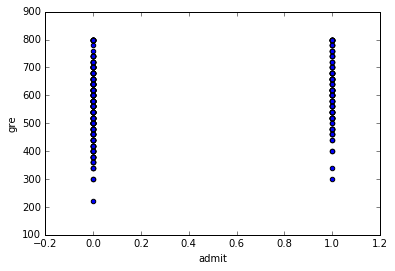

In [190]:
df.plot('admit', 'gre', kind = 'scatter')

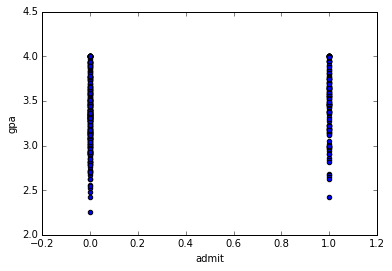

In [191]:
df.plot('admit', 'gpa', kind = 'scatter')

In [192]:
gpa_df = pd.DataFrame({'GPA': df.gpa, 'Admission': y_hat})

gpa_df

,Admission,GPA
0,Not Admitted,3.61
1,Admitted,3.67
2,Admitted,4.00
3,Admitted,3.19
4,Not Admitted,2.93
5,Admitted,3.00
6,Admitted,2.98
7,Not Admitted,3.08
8,Admitted,3.39
9,Not Admitted,3.92


In [204]:
gpa_df.describe()

,GPA
count,397.000000
mean,3.392242
std,0.380208
min,2.260000
25%,3.130000
50%,3.400000
75%,3.670000
max,4.000000


In [200]:
pd.crosstab (df.gpa.std(), df.admit)

admit,0,1
row_0,,
0.380208,271,126


In [209]:
df.gpa.mean()
    for df.admit <=1

IndentationError: unexpected indent (<ipython-input-209-4302512b99ed>, line 2)

In [206]:
df

,admit,gre,gpa,prestige,GRE_220.0,GRE_300.0,GRE_340.0,GRE_360.0,GRE_380.0,GRE_400.0,...,GPA_3.9,GPA_3.91,GPA_3.92,GPA_3.93,GPA_3.94,GPA_3.95,GPA_3.97,GPA_3.98,GPA_3.99,GPA_4.0
0,0,380.0,3.61,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,760.0,3.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,560.0,2.98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,400.0,3.08,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,540.0,3.39,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,700.0,3.92,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
def adSum(row):
    if row.admit == 1:
        return row.gpa

    


In [239]:
admitted = df.apply(adSum, axis = 1)


In [245]:
admitted.mean()

3.4892063492063485

In [229]:
def adSum0(row):
    if row.admit == 0:
        return row.gpa

    

In [246]:
notadmitted = df.apply(adSum0, axis = 1)


In [247]:
notadmitted.mean()

3.347158671586714

In [234]:
notadmitted.mean()

3.4892063492063485

In [248]:
gre_df = pd.DataFrame({'GRE': df.gre, 'Admission': y_hat})

gre_df

,Admission,GRE
0,Not Admitted,380.0
1,Admitted,660.0
2,Admitted,800.0
3,Admitted,640.0
4,Not Admitted,520.0
5,Admitted,760.0
6,Admitted,560.0
7,Not Admitted,400.0
8,Admitted,540.0
9,Not Admitted,700.0


In [250]:
def greadmit(row):
    if row.admit == 1:
        return row.gre

    

In [255]:
greadmitted = df.apply(greadmit, axis = 1)


In [256]:
greadmitted.mean()

618.5714285714286

In [257]:
def grenotadmit(row):
    if row.admit == 0:
        return row.gre


In [258]:
grenotadmitted = df.apply(grenotadmit, axis = 1)

grenotadmitted.mean()

573.5793357933579